In [1]:
%%time
from gensim.models.fasttext import FastText as FT_gensim
from gensim.test.utils import datapath
import os

CPU times: user 557 ms, sys: 41.1 ms, total: 598 ms
Wall time: 599 ms


In [2]:
! ls
! ls fasttext_model

ATG_FINAL_3.ipynb  fasttext_train_WE.ipynb	test.csv
ATG_FINAL_5.ipynb  Lemmatize_with_postag.ipynb	title-generation.zip
ATG.ipynb	   new_test.csv			train.csv
checkpoints_ATG4   new_train.csv		vocs.pkl
fasttext_model	   sample_submission.csv


In [3]:
%%time
if os.path.exists('./fasttext_model/model_FT.model'):
    model = FT_gensim.load('/home/alexkay/Arxiv Title Generation/fasttext_model/model_FT.model')
    print(FT_gensim)
    del model
    exit()
    raise SystemExit("Model exists and was LOADED >> Stop right there!")

CPU times: user 594 µs, sys: 86 µs, total: 680 µs
Wall time: 464 µs


In [4]:
# Set file names for train and test data
corpus_file = datapath('/home/alexkay/Arxiv Title Generation/new_train.csv')

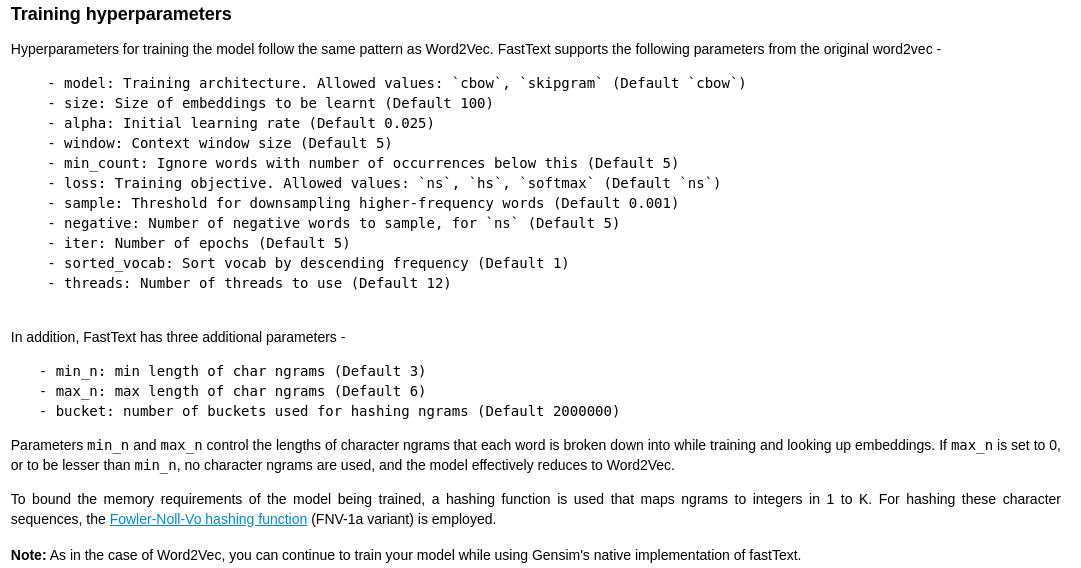

In [5]:
%%time
model_gensim = FT_gensim(size=100)

CPU times: user 1.79 s, sys: 598 ms, total: 2.39 s
Wall time: 2.5 s


In [6]:
%%time
print('build the vocabulary...')
model_gensim.build_vocab(corpus_file=corpus_file)

print('train the model...')
model_gensim.train(
    corpus_file=corpus_file, 
    epochs=10,
    total_examples=model_gensim.corpus_count, 
    total_words=model_gensim.corpus_total_words,
    model='skipgram',
    iter=20,
    threads=1,
    min_count=3
)

print(model_gensim)

build the vocabulary...
train the model...
FastText(vocab=20202, size=100, alpha=0.025)
CPU times: user 11min 20s, sys: 2.99 s, total: 11min 23s
Wall time: 3min 59s


In [7]:
model_gensim.save('./fasttext_model/model_FT.model')

In [8]:
model_gensim.most_similar('bio')

/home/alexkay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('"[\'understand_VERB\',', 0.42038702964782715),
 ('"[\'biological_ADJ\',', 0.417061984539032),
 ("'biomedical_ADJ',", 0.41681957244873047),
 ("'disease_VERB',", 0.4052833914756775),
 ("'healthy_ADJ',", 0.4047594368457794),
 ('"[\'cellular_ADJ\',', 0.4040051996707916),
 ("'understand_VERB',", 0.40022701025009155),
 ("'biomolecular_ADJ',", 0.39573556184768677),
 ("'biological_ADJ',", 0.3919738531112671),
 ('"[\'molecular_ADJ\',', 0.3919089436531067)]

In [9]:
model_gensim['text']

/home/alexkay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.69789398e-02, -3.32186162e-01,  8.66477668e-01,  7.29609281e-02,
       -9.32300568e-01, -3.32175404e-01, -3.16468358e-01,  1.97327277e-03,
       -2.54142940e-01, -2.58114308e-01, -1.28393543e+00, -2.83645481e-01,
       -5.12062497e-02,  2.79438353e+00, -1.03992486e+00,  6.46732509e-01,
       -7.81031787e-01, -7.58136988e-01, -1.96112543e-01, -1.70671940e+00,
       -5.87913036e-01, -1.46837449e+00, -1.30576849e+00, -1.12424743e+00,
        1.11868799e+00,  1.44350791e+00,  8.05051625e-01, -1.40019250e+00,
        1.40736747e+00, -1.26300812e-01,  2.99533665e-01,  8.61091256e-01,
       -5.23673594e-01, -4.70154941e-01,  1.58024096e+00,  3.26736629e-01,
       -8.54544163e-01, -1.65791988e+00, -2.11567259e+00, -8.33864689e-01,
        2.34375045e-01, -1.62671626e+00, -7.54565373e-02,  7.61580586e-01,
       -5.86856186e-01,  2.74720699e-01, -2.23987579e-01, -1.23529315e+00,
       -2.03930717e-02,  6.91355169e-02, -8.19841743e-01,  2.24235862e-01,
       -2.33790711e-01, -

In [10]:
exit()